In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:

# Load Dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Basic Exploration
print(df.head())
print(df.info())
print(df.describe())

# Data Cleaning
df.dropna(inplace=True)

# Encoding Categorical Columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

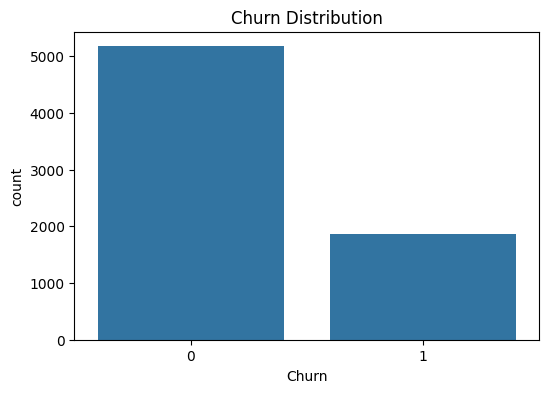

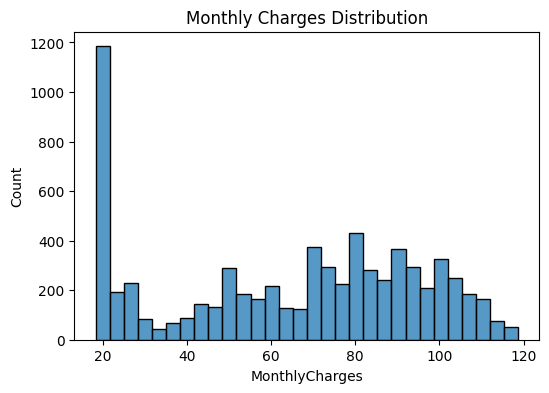

In [3]:

# EDA
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(df['MonthlyCharges'], bins=30)
plt.title("Monthly Charges Distribution")
plt.show()

# Features & Target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [4]:

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model Building
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


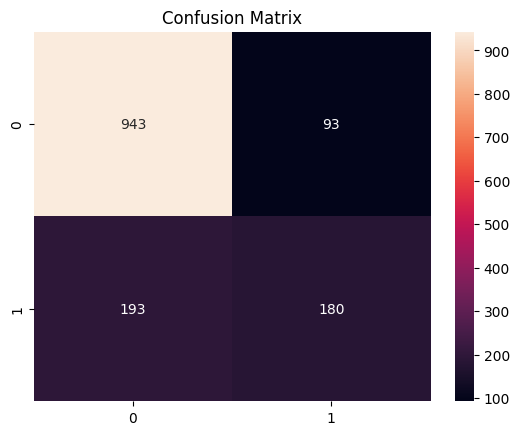

Cross Validation Scores: [0.79701916 0.79914833 0.77572747 0.79119318 0.79971591]
Average CV Score: 0.7925608103748629


In [ ]:

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

# Cross Validation
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())